In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.max_rows = 300
pd.options.display.max_columns = 300

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data1 = pd.read_csv("train (1).csv")
train_data1.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [3]:
train_data1 = train_data1.drop("churn_probability", axis=1)

In [4]:
test_data1 = pd.read_csv("test (1).csv")
test_data1.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   65.330   64.445        31.78        20.23        23.11         60.16   
1  515.568  360.868        75.51        41.21        19.84        474.34   
2  434.884  746.239         7.54         7.86         8.40         16.98   
3  171.390   24.400         5.31         2.16         0.00         40.04   
4  406.289  413.329       450.93       609.03       700.68         60.94   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         32.16         34.83           0.00           0.00           0.00   
1        621.84        394.94           0.00           0.00           0.00   
2         45.81         45.04          22.81         103.38          26.08   
3        205.01         24.01           0.00           0.00           0.00   
4         23.84         74.16           0.00           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00           0.00           0.00             24.88   
1           0.00           0.00           0.00             75.51   
2          24.53          53.68          54.44              0.00   
3           0.00           0.00           0.00              5.31   
4           0.00           0.00           0.00              0.45   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0             20.23             21.06             18.13             10.89   
1             41.21             19.84            473.61            598.08   
2              0.00              0.00              0.00              0.00   
3              0.00              0.00              2.94             98.61   
4              0.78             14.56              2.39              2.66   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              8.36              0.00             13.58              0.00   
1            377.26              0.73              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             20.51              0.00              0.00              2.35   
4             10.94              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               0.0              0.00              0.03         43.01   
1               0.0              0.00              0.00        549.86   
2               0.0              0.00              0.00          0.00   
3               0.0              6.18              0.00          8.26   
4               0.0              0.00              0.00          2.84   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         44.71         29.43              6.90              0.00   
1        639.29        397.11              0.00              0.00   
2          0.00          0.00              0.00              0.00   
3         98.61         22.86              0.00              2.16   
4          3.44         25.51            450.48            608.24   

 

In [5]:
print(train_data1.shape)
print(test_data1.shape)

(69999, 171)
(30000, 171)


In [6]:
train_data1 = train_data1.reset_index(drop=True)
test_data1 = test_data1.reset_index(drop=True)

In [7]:
print(train_data1)

          id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0          0        109             0.0             0.0             0.0   
1          1        109             0.0             0.0             0.0   
2          2        109             0.0             0.0             0.0   
3          3        109             0.0             0.0             0.0   
4          4        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
69994  69994        109             0.0             0.0             0.0   
69995  69995        109             0.0             0.0             0.0   
69996  69996        109             0.0             0.0             0.0   
69997  69997        109             0.0             0.0             0.0   
69998  69998        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0                6

In [8]:
telecom_data = pd.concat([train_data1, test_data1], ignore_index=True)
telecom_data.shape

(99999, 171)

In [9]:
# Read the data

#telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [10]:
telecom_data.shape

(99999, 171)

In [11]:
telecom_data = telecom_data[~telecom_data.index.duplicated(keep='first')]

In [12]:
churn_data = telecom_data.copy()
churn_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0   87.009    7.527        48.58       124.38         1.29         32.24   
1  122.787   42.953         0.00         0.00         0.00          0.00   
2  103.176    0.000         0.53        15.93         0.00         53.99   
3  205.260  111.095         7.26        16.01         0.00         68.76   
4  128.191  101.565        21.28         4.83         6.13         56.99   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0         96.68          2.33           0.00            0.0            0.0   
1         25.99         30.89           0.00            0.0            0.0   
2         82.05          0.00           0.00            0.0            0.0   
3         78.48         50.23           0.00            0.0            0.0   
4         38.11          9.63          53.64            0.0            0.0   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0           0.00            0.0           0.00              2.23   
1           0.00            0.0           0.00              0.00   
2           0.00            0.0           0.00              0.53   
3           0.00            0.0           1.63              6.99   
4          15.73            0.0           0.00             10.16   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0              0.00              0.28              5.29             16.04   
1              0.00              0.00              0.00              0.00   
2             12.98              0.00             24.11              0.00   
3              3.94              0.00             37.91             44.89   
4              4.83              6.13             36.74             19.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              2.33              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2              0.00              0.00              0.00              0.00   
3             23.63              0.00              0.00              0.00   
4              4.61             11.99              1.23              5.01   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0              0.00              0.00              0.00          7.53   
1              0.00             22.01             29.79          0.00   
2              2.14              0.00              0.00         24.64   
3              0.00              0.00              8.03         44.91   
4              0.00              9.85              0.00         58.91   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0         16.04          2.61             46.34            124.38   
1          0.00          0.00              0.00              0.00   
2         12.98          0.00              0.00              2.94   
3         48.84         23.63              0.26             12.06   
4         25.94         15.76              0.00              0.00   

   std_og_t2t_mo

In [13]:
churn_data.shape

(99999, 171)

In [14]:
telecom_columns  = telecom_data.columns.tolist()

In [15]:
hvc = [c for c in telecom_columns if "rech" in c]
hvc

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [16]:
# Though we have total amount of recharge for talktime we dont have that number for data, instead we have average and number of rechanrges
# so let's calculate that amount
churn_data['total_data_rech_amt_6'] = churn_data['av_rech_amt_data_6'] * churn_data['total_rech_data_6']
churn_data['total_data_rech_amt_7'] = churn_data['av_rech_amt_data_7'] * churn_data['total_rech_data_7']
churn_data['total_data_rech_amt_8'] = churn_data['av_rech_amt_data_8'] * churn_data['total_rech_data_8']

# Drop the columns already accounted for 
churn_data.drop(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6',
              'av_rech_amt_data_7', 'av_rech_amt_data_8'], axis=1, inplace=True)

# Find Average recharge amount for good phase i.e 6th month
good_phase_average_rech_amt = ( churn_data['total_rech_amt_6'].fillna(0) + 
                               churn_data['total_data_rech_amt_6'].fillna(0) )

# 70 percentile of the good_phase_average_rech_amt data
gd_phase_avg_rech_amt_70 = np.percentile(good_phase_average_rech_amt, 70.0)
print(f'70 Percentile of recharge amount is : {gd_phase_avg_rech_amt_70}')

# Keep high value customer data
churn_data = churn_data[good_phase_average_rech_amt >= gd_phase_avg_rech_amt_70]

print(f'Shape of high value customer data: {churn_data.shape}')

70 Percentile of recharge amount is : 476.0
Shape of high value customer data: (30156, 168)


In [17]:
# Seperating columns for the 8th month
mnth8_columns = [col for col in telecom_columns if '8' in col]
print(mnth8_columns)
# Seperating the ic columns 
mnth8_ic_columns = [col for col in mnth8_columns if 'ic' in col and 'mou' in col]
print(mnth8_ic_columns)
# Seperating oc columns
mnth8_oc_columns = [col for col in mnth8_columns if 'oc' in col and 'mou' in col]
print(mnth8_oc_columns)
# Seperating vol columns
mnth8_vol_columns = [col for col in mnth8_columns if 'vol' in col and 'mb' in col]
mnth8_vol_columns

['last_date_of_month_8', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'date_of_last_rech_8', 'last_day_rch_amt_8', 'date_of_last_rech_data_8', 'total_rech_data_8', 'max_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'arpu_3g_8', 'arpu_2g_8', 'night_pck_user_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'fb_user_8']
['roam_ic_mou_8', 'loc_i

['vol_2g_mb_8', 'vol_3g_mb_8']

In [18]:
churn_data

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
4          4        109             0.0             0.0             0.0   
10        10        109             0.0             0.0             0.0   
12        12        109             0.0             0.0             0.0   
14        14        109             0.0             0.0             0.0   
15        15        109             0.0             0.0             0.0   
...      ...        ...             ...             ...             ...   
99984  99984        109             0.0             0.0             0.0   
99989  99989        109             0.0             0.0             0.0   
99992  99992        109             0.0             0.0             0.0   
99994  99994        109             0.0             0.0             0.0   
99997  99997        109             0.0             0.0             0.0   

      last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
4                6/30/2014            7/31/2014            8/31/2014   
10               6/30/2014            7/31/2014            8/31/2014   
12               6/30/2014            7/31/2014            8/31/2014   
14               6/30/2014            7/31/2014            8/31/2014   
15               6/30/2014            7/31/2014            8/31/2014   
...                    ...                  ...                  ...   
99984            6/30/2014            7/31/2014            8/31/2014   
99989            6/30/2014            7/31/2014            8/31/2014   
99992            6/30/2014            7/31/2014            8/31/2014   
99994            6/30/2014            7/31/2014            8/31/2014   
99997            6/30/2014            7/31/2014            8/31/2014   

         arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
4       240.708  128.191  101.565        21.28         4.83         6.13   
10      445.826   18.310   24.690        16.54         0.00         0.00   
12      439.919  397.946  392.024       244.46       108.31        42.98   
14      340.266  205.397  191.780       123.76       116.34        75.93   
15      580.549  377.294  338.286        10.43        24.99       194.43   
...         ...      ...      ...          ...          ...          ...   
99984   701.057  801.656  334.173         2.68         6.56         0.70   
99989   176.373  161.387  215.688        11.13        16.03        15.99   
99992   464.195  157.923   23.090      1252.34       160.01         8.58   
99994   718.870  396.259  406.150       324.46       250.01       285.41   
99997  1122.912  781.121  257.439       122.74        50.23        26.46   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
4             56.99         38.11          9.63          53.64           0.00   
10           104.81          8.16          2.36          18.56           0.00   
12           571.98        727.91        644.43           0.00           0.00   
14            98.51         94.11        150.61           0.00           0.00   
15           317.11        341.79        197.09           0.00           0.00   
...             ...           ...           ...            ...            ...   
99984        234.01        204.16         19.63           0.00           0.00   
99989         32.49         21.48         93.53           0.00           0.00   
99992         56.29         25.48         21.14           0.00           3.71   
99994        190.36        166.14        221.96          87.76          14.78   
99997       1854.09       1088.83        306.16           0.00          21.66   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
4               0.00          15.73           0.00           0.00   
10              0.00          20.30           0.00           0.00   
12              0.00           0.00           0.00           0.00   
14              0.00           0.00           0.00           0.00   
15           

In [19]:
telecom_data.head(100)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0    0        109             0.0             0.0             0.0   
1    1        109             0.0             0.0             0.0   
2    2        109             0.0             0.0             0.0   
3    3        109             0.0             0.0             0.0   
4    4        109             0.0             0.0             0.0   
5    5        109             0.0             0.0             0.0   
6    6        109             0.0             0.0             0.0   
7    7        109             0.0             0.0             0.0   
8    8        109             0.0             0.0             0.0   
9    9        109             0.0             0.0             0.0   
10  10        109             0.0             0.0             0.0   
11  11        109             0.0             0.0             0.0   
12  12        109             0.0             0.0             0.0   
13  13        109             0.0             0.0             0.0   
14  14        109             0.0             0.0             0.0   
15  15        109             0.0             0.0             0.0   
16  16        109             0.0             0.0             0.0   
17  17        109             0.0             0.0             0.0   
18  18        109             0.0             0.0             0.0   
19  19        109             0.0             0.0             0.0   
20  20        109             0.0             0.0             0.0   
21  21        109             0.0             0.0             0.0   
22  22        109             0.0             0.0             0.0   
23  23        109             0.0             0.0             0.0   
24  24        109             0.0             0.0             0.0   
25  25        109             0.0             0.0             0.0   
26  26        109             0.0             0.0             0.0   
27  27        109             0.0             0.0             0.0   
28  28        109             0.0             0.0             0.0   
29  29        109             0.0             0.0             0.0   
30  30        109             0.0             0.0             0.0   
31  31        109             0.0             0.0             0.0   
32  32        109             0.0             0.0             0.0   
33  33        109             0.0             0.0             0.0   
34  34        109             0.0             0.0             0.0   
35  35        109             0.0             0.0             0.0   
36  36        109             0.0             0.0             0.0   
37  37        109             0.0             0.0             0.0   
38  38        109             0.0             0.0             0.0   
39  39        109             0.0             0.0             0.0   
40  40        109             0.0             0.0             0.0   
41  41        109             0.0             0.0             0.0   
42  42        109             0.0             0.0             0.0   
43  43        109             0.0             0.0             0.0   
44  44        109             0.0             0.0             0.0   
45  45        109             0.0             0.0             0.0   
46  46        109             0.0             0.0             0.0   
47  47        109             0.0             0.0             0.0   
48  48        109             0.0             0.0             0.0   
49  49        109             0.0             0.0             0.0   
50  50        109             0.0             0.0             0.0   
51  51        109             0.0             0.0             0.0   
52  52        109             0.0             0.0             0.0   
53  53        109             0.0             0.0             0.0   
54  54        109             0.0             0.0             0.0   
55  55        109             0.0             0.0             0.0   
56  56        109             0.0             0.0             0.0   
57

In [20]:
telecom_data[mnth8_ic_columns].sum(axis=1)

0         120.98
1          75.10
2         109.41
3         251.51
4          84.91
          ...   
99994    1991.59
99995     245.75
99996      85.66
99997      27.78
99998     819.13
Length: 99999, dtype: float64

In [21]:
churn_data.head(100)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
4      4        109             0.0             0.0             0.0   
10    10        109             0.0             0.0             0.0   
12    12        109             0.0             0.0             0.0   
14    14        109             0.0             0.0             0.0   
15    15        109             0.0             0.0             0.0   
23    23        109             0.0             0.0             0.0   
27    27        109             0.0             0.0             0.0   
33    33        109             0.0             0.0             0.0   
39    39        109             0.0             0.0             0.0   
45    45        109             0.0             0.0             0.0   
52    52        109             0.0             0.0             0.0   
53    53        109             0.0             0.0             0.0   
54    54        109             0.0             0.0             0.0   
57    57        109             0.0             0.0             0.0   
58    58        109             0.0             0.0             0.0   
63    63        109             0.0             0.0             0.0   
68    68        109             0.0             0.0             0.0   
75    75        109             0.0             0.0             0.0   
76    76        109             0.0             0.0             0.0   
78    78        109             0.0             0.0             0.0   
79    79        109             0.0             0.0             0.0   
81    81        109             0.0             0.0             0.0   
84    84        109             0.0             0.0             0.0   
86    86        109             0.0             0.0             0.0   
88    88        109             0.0             0.0             0.0   
89    89        109             0.0             0.0             0.0   
93    93        109             0.0             0.0             0.0   
94    94        109             0.0             0.0             0.0   
96    96        109             0.0             0.0             0.0   
97    97        109             0.0             0.0             0.0   
98    98        109             0.0             0.0             0.0   
106  106        109             0.0             0.0             0.0   
110  110        109             0.0             0.0             0.0   
111  111        109             0.0             0.0             0.0   
114  114        109             0.0             0.0             0.0   
115  115        109             0.0             0.0             0.0   
117  117        109             0.0             0.0             0.0   
122  122        109             0.0             0.0             0.0   
125  125        109             0.0             0.0             0.0   
126  126        109             0.0             0.0             0.0   
128  128        109             0.0             0.0             0.0   
129  129        109             0.0             0.0             0.0   
132  132        109             0.0             0.0             0.0   
136  136        109             0.0             0.0             0.0   
137  137        109             0.0             0.0             0.0   
139  139        109             0.0             0.0             0.0   
149  149        109             0.0             0.0             0.0   
151  151        109             0.0             0.0             0.0   
157  157        109             0.0             0.0             0.0   
158  158        109             0.0             0.0             0.0   
160  160        109             0.0             0.0             0.0   
161  161        109             0.0             0.0             0.0   
162  162        109             0.0             0.0             0.0   
165  165        109             0.0             0.0             0.0   
170  170        109             0.0             0.0             0.0   
172  172        109           

In [22]:
churn_data.index.is_unique

True

In [23]:
churn_data.index.duplicated

<bound method Index.duplicated of Int64Index([    4,    10,    12,    14,    15,    23,    27,    33,    39,
               45,
            ...
            99965, 99969, 99970, 99973, 99977, 99984, 99989, 99992, 99994,
            99997],
           dtype='int64', length=30156)>

In [24]:
# Sum of all the ic columns
churn_data['ic_sum'] = telecom_data[mnth8_ic_columns].sum(axis = 1)

# Sum of all the oc columns
churn_data['oc_sum'] = telecom_data[mnth8_oc_columns].sum(axis = 1)

# Sum of all the vol columns
churn_data['vol_sum'] = telecom_data[mnth8_vol_columns].sum(axis = 1)


In [25]:
churn_tag_columns = ['vol_sum', 'oc_sum', 'ic_sum']

# Create churn as the sum of newly aggregrated columns, as that will be 0 if all of the columns have 0 values
churn_data['churn'] = churn_data[churn_tag_columns].sum(axis = 1)

churn_data.head(15)

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
4    4        109             0.0             0.0             0.0   
10  10        109             0.0             0.0             0.0   
12  12        109             0.0             0.0             0.0   
14  14        109             0.0             0.0             0.0   
15  15        109             0.0             0.0             0.0   
23  23        109             0.0             0.0             0.0   
27  27        109             0.0             0.0             0.0   
33  33        109             0.0             0.0             0.0   
39  39        109             0.0             0.0             0.0   
45  45        109             0.0             0.0             0.0   
52  52        109             0.0             0.0             0.0   
53  53        109             0.0             0.0             0.0   
54  54        109             0.0             0.0             0.0   
57  57        109             0.0             0.0             0.0   
58  58        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
4             6/30/2014            7/31/2014            8/31/2014   240.708   
10            6/30/2014            7/31/2014            8/31/2014   445.826   
12            6/30/2014            7/31/2014            8/31/2014   439.919   
14            6/30/2014            7/31/2014            8/31/2014   340.266   
15            6/30/2014            7/31/2014            8/31/2014   580.549   
23            6/30/2014            7/31/2014            8/31/2014  1130.948   
27            6/30/2014            7/31/2014            8/31/2014   390.489   
33            6/30/2014            7/31/2014            8/31/2014   438.077   
39            6/30/2014            7/31/2014            8/31/2014   348.187   
45            6/30/2014            7/31/2014            8/31/2014  1361.775   
52            6/30/2014            7/31/2014            8/31/2014   511.711   
53            6/30/2014            7/31/2014            8/31/2014   687.930   
54            6/30/2014            7/31/2014            8/31/2014   161.149   
57            6/30/2014            7/31/2014            8/31/2014   420.095   
58            6/30/2014            7/31/2014            8/31/2014   422.791   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
4    128.191   101.565        21.28         4.83         6.13         56.99   
10    18.310    24.690        16.54         0.00         0.00        104.81   
12   397.946   392.024       244.46       108.31        42.98        571.98   
14   205.397   191.780       123.76       116.34        75.93         98.51   
15   377.294   338.286        10.43        24.99       194.43        317.11   
23   905.506   479.762       859.53       372.71         0.89        293.46   
27   350.985   421.300         8.58        11.48        12.68        133.16   
33     0.000   213.781          NaN          NaN         0.00           NaN   
39   630.031   974.914        64.66       598.74       565.66         37.83   
45  1658.481  1317.325       872.16       546.06      1078.93        410.56   
52   395.991   432.337       800.44       532.08       690.84        167.06   
53   890.334   690.679       104.84       170.21       122.41        149.78   
54    30.278     8.713         0.80          NaN         0.00          0.00   
57   479.535   332.430        27.34        95.66        53.54        177.53   
58   333.628   288.409       508.64       235.89       209.24         82.28   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
4          38.11          9.63          53.64           0.00           0.00   
10          8.16          2.36          18.56           0.00           0.00   
12        727.91        644.43           0.00           0.00           0.00   
14         94.11        150.61           0.00        

In [26]:
# If the churn value is greater than 0 that means the user used a service indicating an active user
churn_data['churn'] = churn_data['churn'].apply(lambda x: 0 if x > 0 else 1)
churn_data.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
4    4        109             0.0             0.0             0.0   
10  10        109             0.0             0.0             0.0   
12  12        109             0.0             0.0             0.0   
14  14        109             0.0             0.0             0.0   
15  15        109             0.0             0.0             0.0   

   last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
4             6/30/2014            7/31/2014            8/31/2014  240.708   
10            6/30/2014            7/31/2014            8/31/2014  445.826   
12            6/30/2014            7/31/2014            8/31/2014  439.919   
14            6/30/2014            7/31/2014            8/31/2014  340.266   
15            6/30/2014            7/31/2014            8/31/2014  580.549   

     arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
4   128.191  101.565        21.28         4.83         6.13         56.99   
10   18.310   24.690        16.54         0.00         0.00        104.81   
12  397.946  392.024       244.46       108.31        42.98        571.98   
14  205.397  191.780       123.76       116.34        75.93         98.51   
15  377.294  338.286        10.43        24.99       194.43        317.11   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
4          38.11          9.63          53.64            0.0            0.0   
10          8.16          2.36          18.56            0.0            0.0   
12        727.91        644.43           0.00            0.0            0.0   
14         94.11        150.61           0.00            0.0            0.0   
15        341.79        197.09           0.00            0.0            0.0   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
4           15.73            0.0            0.0             10.16   
10          20.30            0.0            0.0             16.54   
12           0.00            0.0            0.0              0.00   
14           0.00            0.0            0.0             88.43   
15           0.00            0.0            0.0             10.43   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4               4.83              6.13             36.74             19.88   
10              0.00              0.00             47.36              1.44   
12              7.86              3.98             44.01             13.93   
14             78.51             72.08             49.48             41.76   
15             24.99            194.43            313.76            330.88   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
4               4.61             11.99              1.23              5.01   
10              0.00             25.98              0.00              0.00   
12             51.24              0.00              0.00              0.00   
14             43.19              1.76              0.00              3.06   
15            185.88              3.26             10.91              4.94   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
4               0.00              9.85               0.0         58.91   
10              0.00              0.00               0.0         89.89   
12              0.00              0.00               0.0         44.01   
14              8.16              0.00               0.0        139.68   
15              0.00              0.00               0.0        327.46   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          25.94         15.76              0.00              0.00   
10          1.44          0.00              0.00              0.00   
12         21.79         55.23            244.46            100.44   
14        120.28        118.34             35.33             37.83   
15        366.79        385.26    

In [27]:
churn_data.churn.value_counts(normalize=True)

0    0.946246
1    0.053754
Name: churn, dtype: float64

In [28]:
# Dropping Month 8 Columns

churn_data.drop( [ col for col in mnth8_columns + churn_tag_columns if col not in ['total_rech_data_8', 'av_rech_amt_data_8'] ],
                axis=1, inplace=True)
churn_data.shape

(30156, 117)

In [29]:
# Checking for missing values
msng_values = round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)
msng_values

total_data_rech_amt_8       51.78
max_rech_data_7             51.64
arpu_3g_7                   51.64
arpu_2g_7                   51.64
fb_user_7                   51.64
night_pck_user_7            51.64
total_data_rech_amt_7       51.64
count_rech_3g_7             51.64
date_of_last_rech_data_7    51.64
count_rech_2g_7             51.64
arpu_3g_6                   43.77
date_of_last_rech_data_6    43.77
max_rech_data_6             43.77
fb_user_6                   43.77
count_rech_2g_6             43.77
total_data_rech_amt_6       43.77
arpu_2g_6                   43.77
night_pck_user_6            43.77
count_rech_3g_6             43.77
loc_ic_mou_7                 3.08
spl_og_mou_7                 3.08
og_others_7                  3.08
loc_ic_t2t_mou_7             3.08
loc_ic_t2m_mou_7             3.08
loc_ic_t2f_mou_7             3.08
std_ic_t2m_mou_7             3.08
std_ic_t2t_mou_7             3.08
std_ic_t2o_mou_7             3.08
std_ic_mou_7                 3.08
spl_ic_mou_7  

In [30]:
# Select columns with more than 40% missing values
drop_msng_col = msng_values[msng_values > 40].index.tolist()
drop_msng_col

['total_data_rech_amt_8',
 'max_rech_data_7',
 'arpu_3g_7',
 'arpu_2g_7',
 'fb_user_7',
 'night_pck_user_7',
 'total_data_rech_amt_7',
 'count_rech_3g_7',
 'date_of_last_rech_data_7',
 'count_rech_2g_7',
 'arpu_3g_6',
 'date_of_last_rech_data_6',
 'max_rech_data_6',
 'fb_user_6',
 'count_rech_2g_6',
 'total_data_rech_amt_6',
 'arpu_2g_6',
 'night_pck_user_6',
 'count_rech_3g_6']

In [31]:
# Drop columns > 40% missing
churn_data.drop(drop_msng_col, axis=1, inplace=True)
churn_data.shape

(30156, 98)

In [32]:
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

spl_og_mou_7            3.08
std_og_t2m_mou_7        3.08
loc_og_t2f_mou_7        3.08
std_ic_t2t_mou_7        3.08
loc_og_t2c_mou_7        3.08
loc_og_mou_7            3.08
loc_ic_mou_7            3.08
std_og_t2t_mou_7        3.08
loc_ic_t2f_mou_7        3.08
loc_og_t2t_mou_7        3.08
std_og_t2f_mou_7        3.08
loc_ic_t2m_mou_7        3.08
std_og_t2c_mou_7        3.08
std_og_mou_7            3.08
loc_ic_t2t_mou_7        3.08
isd_og_mou_7            3.08
std_ic_t2m_mou_7        3.08
loc_og_t2m_mou_7        3.08
og_others_7             3.08
spl_ic_mou_7            3.08
ic_others_7             3.08
std_ic_t2f_mou_7        3.08
roam_ic_mou_7           3.08
isd_ic_mou_7            3.08
offnet_mou_7            3.08
std_ic_t2o_mou_7        3.08
onnet_mou_7             3.08
roam_og_mou_7           3.08
std_ic_mou_7            3.08
loc_ic_t2t_mou_6        1.54
ic_others_6             1.54
loc_ic_t2m_mou_6        1.54
isd_ic_mou_6            1.54
std_ic_t2f_mou_6        1.54
spl_ic_mou_6  

In [33]:
# Drop rows with missing values
for col in churn_data.columns:
    churn_data = churn_data[~churn_data[col].isna()]
    
# Re-check missing values
round(churn_data.isna().sum() / len(churn_data) * 100, 2).sort_values(ascending=False)

id                      0.0
total_rech_amt_6        0.0
total_rech_num_6        0.0
ic_others_7             0.0
ic_others_6             0.0
isd_ic_mou_7            0.0
isd_ic_mou_6            0.0
spl_ic_mou_7            0.0
spl_ic_mou_6            0.0
total_ic_mou_7          0.0
total_ic_mou_6          0.0
std_ic_mou_7            0.0
std_ic_mou_6            0.0
std_ic_t2o_mou_7        0.0
std_ic_t2o_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2t_mou_6        0.0
loc_ic_mou_7            0.0
loc_ic_mou_6            0.0
total_rech_num_7        0.0
total_rech_amt_7        0.0
circle_id               0.0
max_rech_amt_6          0.0
jun_vbc_3g              0.0
jul_vbc_3g              0.0
aug_vbc_3g              0.0
aon                     0.0
sachet_3g_7             0.0
sachet_3g_6             0.0
monthly_3g_7            0.0
monthly_3g_6            0.0
sachet_2g_7         

In [34]:
# The date columns don't add any value excpet for marking the last day of the period so we will drop them
date_col = [col for col in churn_data.columns if 'date' in col]
churn_data.drop(date_col, axis=1, inplace=True)
[col for col in churn_data.columns if 'date' in col]

[]

In [35]:
print(churn_data.shape)
churn_data.head(20)

(28945, 94)


id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou    arpu_6  \
4    4        109             0.0             0.0             0.0   240.708   
10  10        109             0.0             0.0             0.0   445.826   
12  12        109             0.0             0.0             0.0   439.919   
14  14        109             0.0             0.0             0.0   340.266   
15  15        109             0.0             0.0             0.0   580.549   
23  23        109             0.0             0.0             0.0  1130.948   
27  27        109             0.0             0.0             0.0   390.489   
39  39        109             0.0             0.0             0.0   348.187   
45  45        109             0.0             0.0             0.0  1361.775   
52  52        109             0.0             0.0             0.0   511.711   
53  53        109             0.0             0.0             0.0   687.930   
57  57        109             0.0             0.0             0.0   420.095   
58  58        109             0.0             0.0             0.0   422.791   
63  63        109             0.0             0.0             0.0   241.317   
68  68        109             0.0             0.0             0.0   693.378   
75  75        109             0.0             0.0             0.0  1032.062   
78  78        109             0.0             0.0             0.0  1677.059   
79  79        109             0.0             0.0             0.0   900.286   
81  81        109             0.0             0.0             0.0   475.926   
84  84        109             0.0             0.0             0.0   637.800   

      arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
4    128.191        21.28         4.83         56.99         38.11   
10    18.310        16.54         0.00        104.81          8.16   
12   397.946       244.46       108.31        571.98        727.91   
14   205.397       123.76       116.34         98.51         94.11   
15   377.294        10.43        24.99        317.11        341.79   
23   905.506       859.53       372.71        293.46        450.11   
27   350.985         8.58        11.48        133.16        158.73   
39   630.031        64.66       598.74         37.83        339.28   
45  1658.481       872.16       546.06        410.56        420.19   
52   395.991       800.44       532.08        167.06        176.14   
53   890.334       104.84       170.21        149.78        409.39   
57   479.535        27.34        95.66        177.53        141.94   
58   333.628       508.64       235.89         82.28         70.23   
63   142.114         7.91         3.41         11.48         24.93   
68   434.528      1036.49       656.21        300.94         95.68   
75   483.590       552.53       290.29        155.31         69.86   
78   639.889       120.01       155.68       1600.31        484.06   
79  1062.752      1497.71      2058.68        496.61        623.83   
81   507.195       708.18       553.74        434.58        416.56   
84   480.074      1241.99      1026.66        112.91        115.13   

    roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4           53.64           0.00          15.73           0.00   
10          18.56           0.00          20.30           0.00   
12           0.00           0.00           0.00           0.00   
14           0.00           0.00           0.00           0.00   
15           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00   
27           0.00           0.00           0.00           0.00   
39           0.00           0.00           0.00           0.00   
45           8.83         149.04           6.43         388.73   
52           0.00           0.00           0.00           0.00   
53           0.00           0.00           0.00           0.00   
57           9.06           0.00          51.36           0.00   
58           0.

In [36]:
# Check columns for only 1 unique value
drop_col_sngl_val = []

for col in churn_data.columns:
    if churn_data[f'{col}'].nunique() == 1:
        drop_col_sngl_val.append(col)

drop_col_sngl_val

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7']

In [37]:
# Drop single value columns
churn_data.drop(drop_col_sngl_val, axis=1, inplace=True)
churn_data.shape

(28945, 86)

In [38]:
# Drop the column 'id' as it does not add any information 
churn_data.drop('id', axis=1, inplace=True)
churn_data.head()

arpu_6   arpu_7  onnet_mou_6  onnet_mou_7  offnet_mou_6  offnet_mou_7  \
4   240.708  128.191        21.28         4.83         56.99         38.11   
10  445.826   18.310        16.54         0.00        104.81          8.16   
12  439.919  397.946       244.46       108.31        571.98        727.91   
14  340.266  205.397       123.76       116.34         98.51         94.11   
15  580.549  377.294        10.43        24.99        317.11        341.79   

    roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  roam_og_mou_7  \
4           53.64            0.0          15.73            0.0   
10          18.56            0.0          20.30            0.0   
12           0.00            0.0           0.00            0.0   
14           0.00            0.0           0.00            0.0   
15           0.00            0.0           0.00            0.0   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
4              10.16              4.83             36.74             19.88   
10             16.54              0.00             47.36              1.44   
12              0.00              7.86             44.01             13.93   
14             88.43             78.51             49.48             41.76   
15             10.43             24.99            313.76            330.88   

    loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
4              11.99              1.23              0.00              9.85   
10             25.98              0.00              0.00              0.00   
12              0.00              0.00              0.00              0.00   
14              1.76              0.00              8.16              0.00   
15              3.26             10.91              0.00              0.00   

    loc_og_mou_6  loc_og_mou_7  std_og_t2t_mou_6  std_og_t2t_mou_7  \
4          58.91         25.94              0.00              0.00   
10         89.89          1.44              0.00              0.00   
12         44.01         21.79            244.46            100.44   
14        139.68        120.28             35.33             37.83   
15        327.46        366.79              0.00              0.00   

    std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  \
4               4.35              0.00               0.0               0.0   
10             11.16              6.71               0.0               0.0   
12            527.96            713.98               0.0               0.0   
14             38.63             52.34               0.0               0.0   
15              0.00              0.00               0.0               0.0   

    std_og_mou_6  std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  \
4           4.35          0.00           0.0           0.0          0.00   
10         11.16          6.71           0.0           0.0          0.00   
12        772.43        814.43           0.0           0.0          0.00   
14         73.96         90.18           0.0           0.0          8.79   
15          0.00          0.00           0.0           0.0          0.08   

    spl_og_mou_7  og_others_6  og_others_7  total_og_mou_6  total_og_mou_7  \
4           17.0         0.00          0.0           63.26           42.94   
10           0.0         0.00          0.0          101.06            8.16   
12           0.0         0.00          0.0          816.44          836.23   
14           0.0         6.23          0.0          228.68          210.46   
15           0.0         0.10          0.0          327.64          366.79   

    loc_ic_t2t_mou_6  loc_ic_t2t_mou_7  loc_ic_t2m_mou_6  loc_ic_t2m_mou_7  \
4               5.44              1.39             10.58              4.33   
10             17.44              0.00            111.46              2.28   
12              0.00              0.53             26.93             25.68   
14            200.73            149.54             87.36             92.9

In [39]:
corr = churn_data.corr()
corr.loc[:, :] = np.tril(corr, -1)
corr = corr.stack()
high_corr_value = corr[(corr > 0.60) | (corr < -0.60)]
high_corr_value

arpu_7              arpu_6              0.760832
onnet_mou_7         onnet_mou_6         0.781100
offnet_mou_7        offnet_mou_6        0.780325
roam_og_mou_6       roam_ic_mou_6       0.641914
loc_og_t2t_mou_7    loc_og_t2t_mou_6    0.789000
loc_og_t2m_mou_7    loc_og_t2m_mou_6    0.793382
loc_og_t2f_mou_7    loc_og_t2f_mou_6    0.812454
loc_og_mou_6        loc_og_t2t_mou_6    0.754809
                    loc_og_t2t_mou_7    0.610276
                    loc_og_t2m_mou_6    0.793572
                    loc_og_t2m_mou_7    0.635694
loc_og_mou_7        loc_og_t2t_mou_6    0.620741
                    loc_og_t2t_mou_7    0.769717
                    loc_og_t2m_mou_6    0.632149
                    loc_og_t2m_mou_7    0.768438
                    loc_og_mou_6        0.810143
std_og_t2t_mou_6    onnet_mou_6         0.856362
                    onnet_mou_7         0.658041
std_og_t2t_mou_7    onnet_mou_6         0.677369
                    onnet_mou_7         0.845897
                    

In [40]:
# List of columns that are explained well by other columns
drop_col_corr = ['loc_og_t2m_mou_6', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 
                 'total_og_mou_6', 'total_og_mou_7', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 
                 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 
                 'total_ic_mou_6', 'total_ic_mou_7', 'total_rech_amt_6', 'total_rech_amt_7', 
                 'vol_3g_mb_6', 'vol_3g_mb_7', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7',
                 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7',
                 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7']

# Drop the high corr columns
churn_data.drop(drop_col_corr, axis=1, inplace=True)
churn_data.shape

(28945, 59)

In [41]:
# Create a total mou instead of offnet and onnet

churn_data['total_mou_6'] = churn_data['onnet_mou_6'] + churn_data['offnet_mou_6']
churn_data['total_mou_7'] = churn_data['onnet_mou_7'] + churn_data['offnet_mou_7']


# Dropping the redundant columns
churn_data.drop(['onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7'], axis=1, inplace=True)

churn_data.head()

arpu_6   arpu_7  roam_ic_mou_6  roam_ic_mou_7  roam_og_mou_6  \
4   240.708  128.191          53.64            0.0          15.73   
10  445.826   18.310          18.56            0.0          20.30   
12  439.919  397.946           0.00            0.0           0.00   
14  340.266  205.397           0.00            0.0           0.00   
15  580.549  377.294           0.00            0.0           0.00   

    roam_og_mou_7  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_mou_6  \
4             0.0              0.00              9.85         58.91   
10            0.0              0.00              0.00         89.89   
12            0.0              0.00              0.00         44.01   
14            0.0              8.16              0.00        139.68   
15            0.0              0.00              0.00        327.46   

    loc_og_mou_7  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_mou_6  \
4          25.94               0.0               0.0          4.35   
10          1.44               0.0               0.0         11.16   
12         21.79               0.0               0.0        772.43   
14        120.28               0.0               0.0         73.96   
15        366.79               0.0               0.0          0.00   

    std_og_mou_7  isd_og_mou_6  isd_og_mou_7  spl_og_mou_6  spl_og_mou_7  \
4           0.00           0.0           0.0          0.00          17.0   
10          6.71           0.0           0.0          0.00           0.0   
12        814.43           0.0           0.0          0.00           0.0   
14         90.18           0.0           0.0          8.79           0.0   
15          0.00           0.0           0.0          0.08           0.0   

    og_others_6  og_others_7  loc_ic_mou_6  loc_ic_mou_7  std_ic_t2t_mou_6  \
4          0.00          0.0         21.54          9.36              0.00   
10         0.00          0.0        140.69          2.28              0.00   
12         0.00          0.0         26.93         26.21              0.23   
14         6.23          0.0        289.09        242.91            102.34   
15         0.10          0.0        233.18        776.36              0.00   

    std_ic_t2t_mou_7  std_ic_t2f_mou_6  std_ic_t2f_mou_7  std_ic_mou_6  \
4               0.00               0.0              0.00          0.00   
10              0.00               0.0              1.53        444.79   
12              0.00               0.0              0.48          7.56   
14             13.01               0.0              0.03        121.41   
15              0.00               0.0              1.03          0.00   

    std_ic_mou_7  spl_ic_mou_6  spl_ic_mou_7  isd_ic_mou_6  isd_ic_mou_7  \
4           0.00          0.00           0.0           0.0           0.0   
10         63.78          0.00           0.0           0.0           0.0   
12          9.13          0.00           0.0           0.0           0.0   
14         93.39          0.44           0.0           0.0           0.0   
15          1.03          0.00           0.0           0.0           0.0   

    ic_others_6  ic_others_7  total_rech_num_6  total_rech_num_7  \
4          0.00         0.00                13                10   
10         0.00         0.00                 8                 3   
12         0.00         0.00                15                10   
14         3.74         0.46                 7                 3   
15         0.00         0.00                 5                 3   

    max_rech_amt_6  max_rech_amt_7  last_day_rch_amt_6  last_day_rch_amt_7  \
4               50              41                  25                  10   
10             110               0                  98                   0   
12             110             110                 110                   0   
14             150             120                 110                 120   
15             250             250                   0                 150   

    vol_2g_mb_6  vol_2g_mb_7  monthl

In [42]:
# Seperate columns for 6th month
col_for_6 = [col[:-2] for col in churn_data.columns if '6' in col]

# Create new feature and drop the redundant columns
for col in set(col_for_6):
    churn_data[f'gd_ph_{col}'] = ( churn_data[f'{col}_6'])
    churn_data.drop([f'{col}_6'], axis=1, inplace=True)
        
churn_data.head()

arpu_7  roam_ic_mou_7  roam_og_mou_7  loc_og_t2c_mou_7  loc_og_mou_7  \
4   128.191            0.0            0.0              9.85         25.94   
10   18.310            0.0            0.0              0.00          1.44   
12  397.946            0.0            0.0              0.00         21.79   
14  205.397            0.0            0.0              0.00        120.28   
15  377.294            0.0            0.0              0.00        366.79   

    std_og_t2f_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  \
4                0.0          0.00           0.0          17.0          0.0   
10               0.0          6.71           0.0           0.0          0.0   
12               0.0        814.43           0.0           0.0          0.0   
14               0.0         90.18           0.0           0.0          0.0   
15               0.0          0.00           0.0           0.0          0.0   

    loc_ic_mou_7  std_ic_t2t_mou_7  std_ic_t2f_mou_7  std_ic_mou_7  \
4           9.36              0.00              0.00          0.00   
10          2.28              0.00              1.53         63.78   
12         26.21              0.00              0.48          9.13   
14        242.91             13.01              0.03         93.39   
15        776.36              0.00              1.03          1.03   

    spl_ic_mou_7  isd_ic_mou_7  ic_others_7  total_rech_num_7  max_rech_amt_7  \
4            0.0           0.0         0.00                10              41   
10           0.0           0.0         0.00                 3               0   
12           0.0           0.0         0.00                10             110   
14           0.0           0.0         0.46                 3             120   
15           0.0           0.0         0.00                 3             250   

    last_day_rch_amt_7  vol_2g_mb_7  monthly_2g_7  sachet_2g_7  monthly_3g_7  \
4                   10       308.89             0            6             0   
10                   0         0.00             0            0             0   
12                   0         0.00             0            0             0   
14                 120         0.00             0            0             0   
15                 150         0.00             0            0             0   

    sachet_3g_7   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn  total_mou_7  \
4             1   647        0.00         0.0        0.00      0        42.94   
10            0   468        1.05         0.0       18.95      0         8.16   
12            0   322        0.00         0.0        0.00      0       836.22   
14            0  1049        0.00         0.0        0.00      0       210.45   
15            0   602        0.00         0.0        0.00      0       366.78   

    gd_ph_monthly_2g  gd_ph_loc_og_t2c_mou  gd_ph_isd_ic_mou  \
4                  0                  0.00               0.0   
10                 0                  0.00               0.0   
12                 0                  0.00               0.0   
14                 0                  8.16               0.0   
15                 1                  0.00               0.0   

    gd_ph_loc_og_mou  gd_ph_ic_others  gd_ph_roam_og_mou  \
4              58.91             0.00              15.73   
10             89.89             0.00              20.30   
12             44.01             0.00               0.00   
14            139.68             3.74               0.00   
15            327.46             0.00               0.00   

    gd_ph_last_day_rch_amt  gd_ph_sachet_3g  gd_ph_std_ic_mou  \
4                       25                0              0.00   
10                      98                0            444.79   
12                     110                0              7.56   
14                     110                0            121.41   
15                       0                0              0.00   

    gd_ph_std_og_mou  gd_ph_spl_og_mou  gd_ph_loc_ic_m

In [43]:
# Create new column
churn_data['gd_ph_vbc_3g'] = churn_data['jun_vbc_3g']

# Drop redundant column
churn_data.drop(['jun_vbc_3g', 'aug_vbc_3g'], axis=1, inplace=True)

# Rename the august column for vbc to vbc_3g_8
churn_data['vbc_3g_7'] = churn_data['jul_vbc_3g']
churn_data.drop('jul_vbc_3g', axis=1, inplace=True)

churn_data.head()

arpu_7  roam_ic_mou_7  roam_og_mou_7  loc_og_t2c_mou_7  loc_og_mou_7  \
4   128.191            0.0            0.0              9.85         25.94   
10   18.310            0.0            0.0              0.00          1.44   
12  397.946            0.0            0.0              0.00         21.79   
14  205.397            0.0            0.0              0.00        120.28   
15  377.294            0.0            0.0              0.00        366.79   

    std_og_t2f_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  \
4                0.0          0.00           0.0          17.0          0.0   
10               0.0          6.71           0.0           0.0          0.0   
12               0.0        814.43           0.0           0.0          0.0   
14               0.0         90.18           0.0           0.0          0.0   
15               0.0          0.00           0.0           0.0          0.0   

    loc_ic_mou_7  std_ic_t2t_mou_7  std_ic_t2f_mou_7  std_ic_mou_7  \
4           9.36              0.00              0.00          0.00   
10          2.28              0.00              1.53         63.78   
12         26.21              0.00              0.48          9.13   
14        242.91             13.01              0.03         93.39   
15        776.36              0.00              1.03          1.03   

    spl_ic_mou_7  isd_ic_mou_7  ic_others_7  total_rech_num_7  max_rech_amt_7  \
4            0.0           0.0         0.00                10              41   
10           0.0           0.0         0.00                 3               0   
12           0.0           0.0         0.00                10             110   
14           0.0           0.0         0.46                 3             120   
15           0.0           0.0         0.00                 3             250   

    last_day_rch_amt_7  vol_2g_mb_7  monthly_2g_7  sachet_2g_7  monthly_3g_7  \
4                   10       308.89             0            6             0   
10                   0         0.00             0            0             0   
12                   0         0.00             0            0             0   
14                 120         0.00             0            0             0   
15                 150         0.00             0            0             0   

    sachet_3g_7   aon  churn  total_mou_7  gd_ph_monthly_2g  \
4             1   647      0        42.94                 0   
10            0   468      0         8.16                 0   
12            0   322      0       836.22                 0   
14            0  1049      0       210.45                 0   
15            0   602      0       366.78                 1   

    gd_ph_loc_og_t2c_mou  gd_ph_isd_ic_mou  gd_ph_loc_og_mou  gd_ph_ic_others  \
4                   0.00               0.0             58.91             0.00   
10                  0.00               0.0             89.89             0.00   
12                  0.00               0.0             44.01             0.00   
14                  8.16               0.0            139.68             3.74   
15                  0.00               0.0            327.46             0.00   

    gd_ph_roam_og_mou  gd_ph_last_day_rch_amt  gd_ph_sachet_3g  \
4               15.73                      25                0   
10              20.30                      98                0   
12               0.00                     110                0   
14               0.00                     110                0   
15               0.00                       0                0   

    gd_ph_std_ic_mou  gd_ph_std_og_mou  gd_ph_spl_og_mou  gd_ph_loc_ic_mou  \
4               0.00              4.35              0.00             21.54   
10            444.79             11.16              0.00            140.69   
12              7.56            772.43              0.00             26.93   
14            121.41             73.96              8.79            289.09   
15              0.00     

In [44]:
churn_data.shape

(28945, 56)

In [45]:
# Reset the index 
churn_data.reset_index(inplace=True, drop=True)
churn_data.head()

arpu_7  roam_ic_mou_7  roam_og_mou_7  loc_og_t2c_mou_7  loc_og_mou_7  \
0  128.191            0.0            0.0              9.85         25.94   
1   18.310            0.0            0.0              0.00          1.44   
2  397.946            0.0            0.0              0.00         21.79   
3  205.397            0.0            0.0              0.00        120.28   
4  377.294            0.0            0.0              0.00        366.79   

   std_og_t2f_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  \
0               0.0          0.00           0.0          17.0          0.0   
1               0.0          6.71           0.0           0.0          0.0   
2               0.0        814.43           0.0           0.0          0.0   
3               0.0         90.18           0.0           0.0          0.0   
4               0.0          0.00           0.0           0.0          0.0   

   loc_ic_mou_7  std_ic_t2t_mou_7  std_ic_t2f_mou_7  std_ic_mou_7  \
0          9.36              0.00              0.00          0.00   
1          2.28              0.00              1.53         63.78   
2         26.21              0.00              0.48          9.13   
3        242.91             13.01              0.03         93.39   
4        776.36              0.00              1.03          1.03   

   spl_ic_mou_7  isd_ic_mou_7  ic_others_7  total_rech_num_7  max_rech_amt_7  \
0           0.0           0.0         0.00                10              41   
1           0.0           0.0         0.00                 3               0   
2           0.0           0.0         0.00                10             110   
3           0.0           0.0         0.46                 3             120   
4           0.0           0.0         0.00                 3             250   

   last_day_rch_amt_7  vol_2g_mb_7  monthly_2g_7  sachet_2g_7  monthly_3g_7  \
0                  10       308.89             0            6             0   
1                   0         0.00             0            0             0   
2                   0         0.00             0            0             0   
3                 120         0.00             0            0             0   
4                 150         0.00             0            0             0   

   sachet_3g_7   aon  churn  total_mou_7  gd_ph_monthly_2g  \
0            1   647      0        42.94                 0   
1            0   468      0         8.16                 0   
2            0   322      0       836.22                 0   
3            0  1049      0       210.45                 0   
4            0   602      0       366.78                 1   

   gd_ph_loc_og_t2c_mou  gd_ph_isd_ic_mou  gd_ph_loc_og_mou  gd_ph_ic_others  \
0                  0.00               0.0             58.91             0.00   
1                  0.00               0.0             89.89             0.00   
2                  0.00               0.0             44.01             0.00   
3                  8.16               0.0            139.68             3.74   
4                  0.00               0.0            327.46             0.00   

   gd_ph_roam_og_mou  gd_ph_last_day_rch_amt  gd_ph_sachet_3g  \
0              15.73                      25                0   
1              20.30                      98                0   
2               0.00                     110                0   
3               0.00                     110                0   
4               0.00                       0                0   

   gd_ph_std_ic_mou  gd_ph_std_og_mou  gd_ph_spl_og_mou  gd_ph_loc_ic_mou  \
0              0.00              4.35              0.00             21.54   
1            444.79             11.16              0.00            140.69   
2              7.56            772.43              0.00             26.93   
3            121.41             73.96              8.79            289.09   
4              0.00              0.00              0.08            233.18   


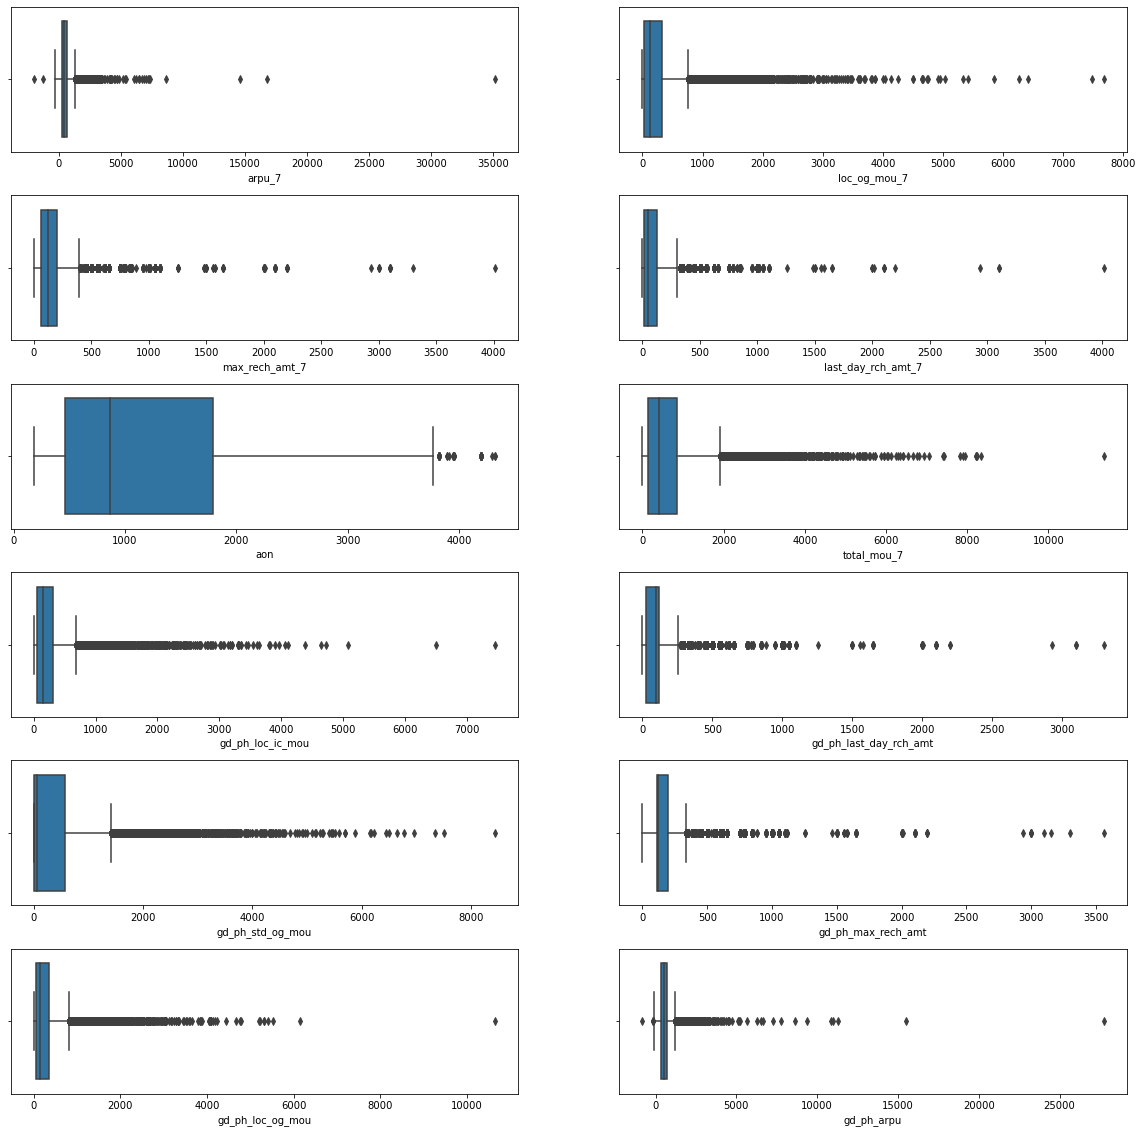

In [46]:
# Going through the output of describe we can filter out the features that needs a second look

# List of features to be analyzed
col_boxplot = ['arpu_7', 'loc_og_mou_7', 'max_rech_amt_7', 'last_day_rch_amt_7', 'aon', 'total_mou_7', 
               'gd_ph_loc_ic_mou', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou', 'gd_ph_max_rech_amt', 
              'gd_ph_loc_og_mou', 'gd_ph_arpu']

# Plot boxplots for each variable
fig, axes = plt.subplots(6, 2, figsize=(20, 20))
# sns.boxplot(x=churn_data['arpu_8'], ax=axes[0])
for index, col in enumerate(col_boxplot):
    i, j = divmod(index, 2)
    sns.boxplot(churn_data[col], ax=axes[i, j])
    
plt.subplots_adjust(hspace=0.3) 
plt.show()

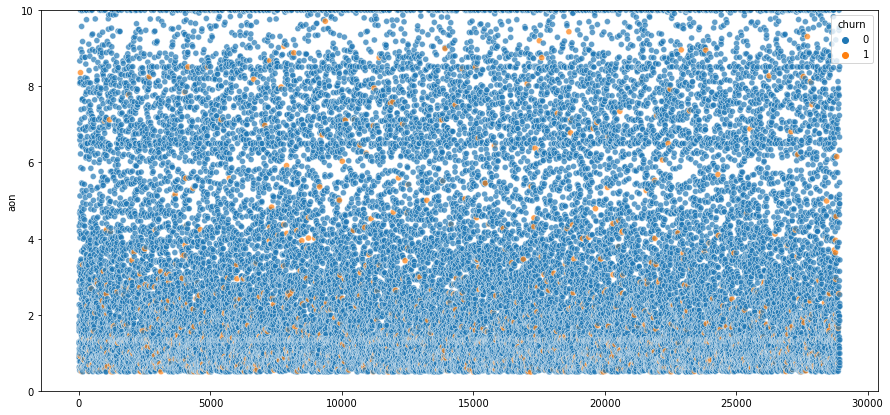

In [47]:
# Check churn based on tenure

plt.figure(figsize=(15,7))
sns.scatterplot(y=churn_data['aon'] / 365, x=churn_data.index, hue=churn_data.churn, alpha=0.7)
plt.ylim(0,10)
plt.show()

In [48]:
churn_data.columns

Index(['arpu_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2c_mou_7',
       'loc_og_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'isd_og_mou_7',
       'spl_og_mou_7', 'og_others_7', 'loc_ic_mou_7', 'std_ic_t2t_mou_7',
       'std_ic_t2f_mou_7', 'std_ic_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7',
       'ic_others_7', 'total_rech_num_7', 'max_rech_amt_7',
       'last_day_rch_amt_7', 'vol_2g_mb_7', 'monthly_2g_7', 'sachet_2g_7',
       'monthly_3g_7', 'sachet_3g_7', 'aon', 'churn', 'total_mou_7',
       'gd_ph_monthly_2g', 'gd_ph_loc_og_t2c_mou', 'gd_ph_isd_ic_mou',
       'gd_ph_loc_og_mou', 'gd_ph_ic_others', 'gd_ph_roam_og_mou',
       'gd_ph_last_day_rch_amt', 'gd_ph_sachet_3g', 'gd_ph_std_ic_mou',
       'gd_ph_std_og_mou', 'gd_ph_spl_og_mou', 'gd_ph_loc_ic_mou',
       'gd_ph_max_rech_amt', 'gd_ph_sachet_2g', 'gd_ph_total_mou',
       'gd_ph_vol_2g_mb', 'gd_ph_arpu', 'gd_ph_og_others',
       'gd_ph_std_ic_t2f_mou', 'gd_ph_spl_ic_mou', 'gd_ph_isd_og_mou',
       'gd_ph_total_rech_nu

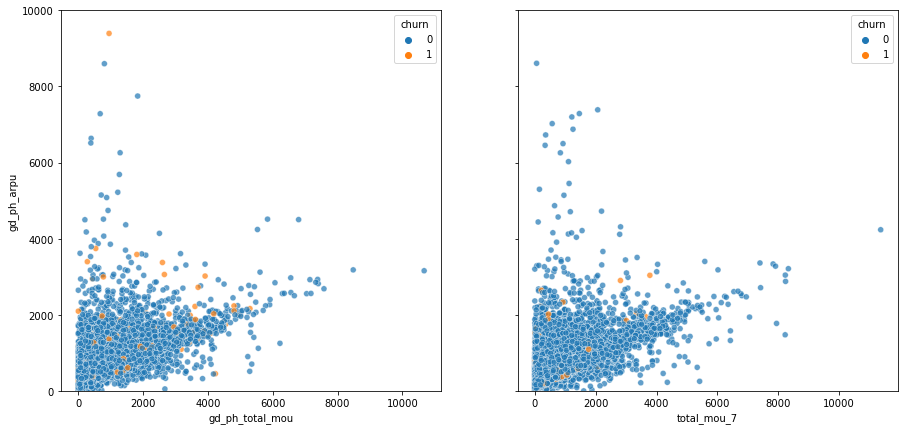

In [49]:
# Lets check how the VBC effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_total_mou', data=churn_data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_7', x='total_mou_7', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()

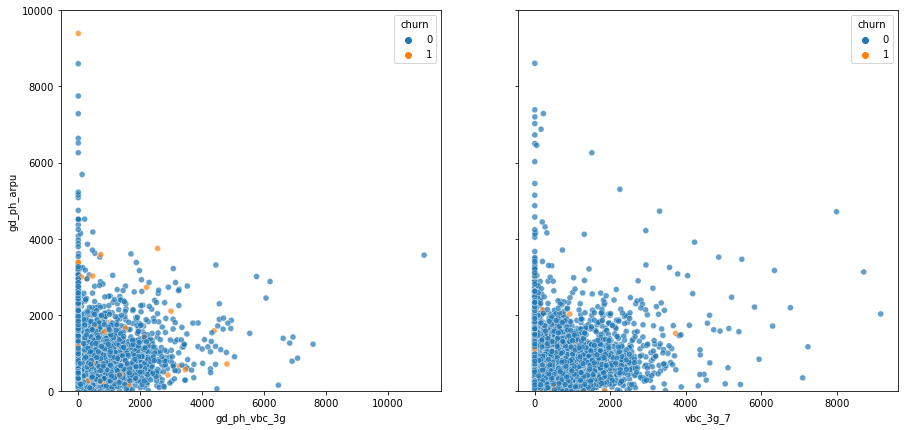

In [50]:
# Lets check how the total_mou effects the revenue
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(y='gd_ph_arpu', x='gd_ph_vbc_3g', data=churn_data, ax=axes[0], hue='churn', alpha=0.7)
sns.scatterplot(y='arpu_7', x='vbc_3g_7', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)


# Limiting the graph to more general upper bound
plt.ylim(0,10000)
plt.show()


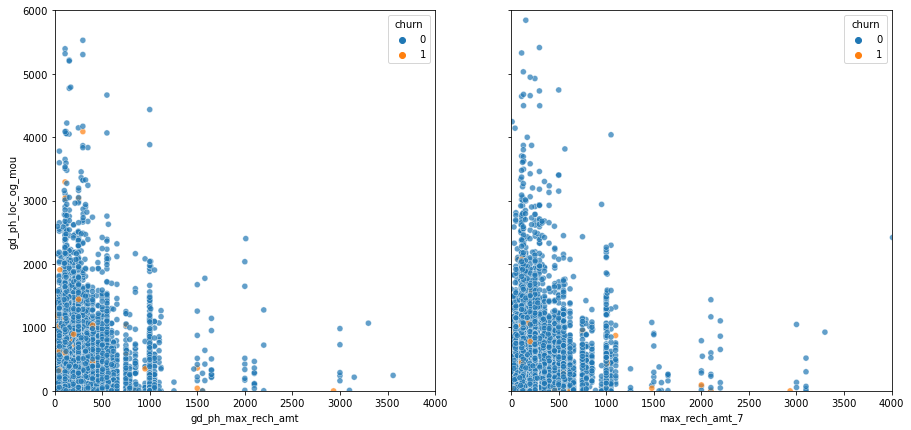

In [51]:
# Lets check the relation between recharge amount and local outgoing calls

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_loc_og_mou', data=churn_data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_7', y='loc_og_mou_7', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,4000)
axes[1].set_xlim(0,4000)
plt.ylim(0,6000)

plt.show()

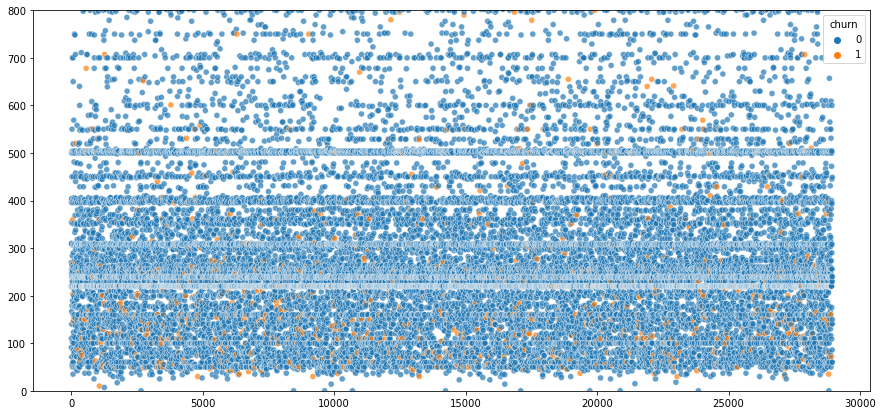

In [52]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=churn_data.index, y=churn_data['gd_ph_max_rech_amt'] + churn_data['max_rech_amt_7'],
                hue=churn_data['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

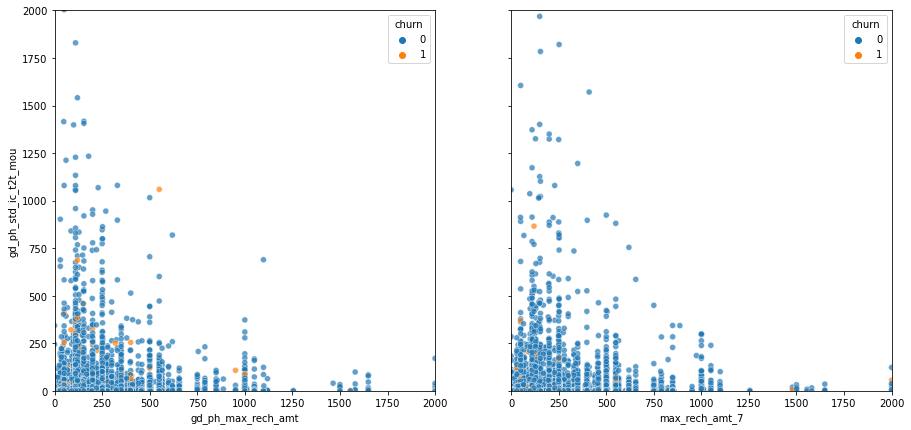

In [53]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=churn_data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_7', y='std_ic_t2t_mou_7', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

In [54]:
#Observations
#Users who were recharging with high amounts were using the service for local uses less as compared to user who did lesser amounts of recharge
#Intuitevly people whose max recharge amount as well as local out going were very less even in the good phase churned more

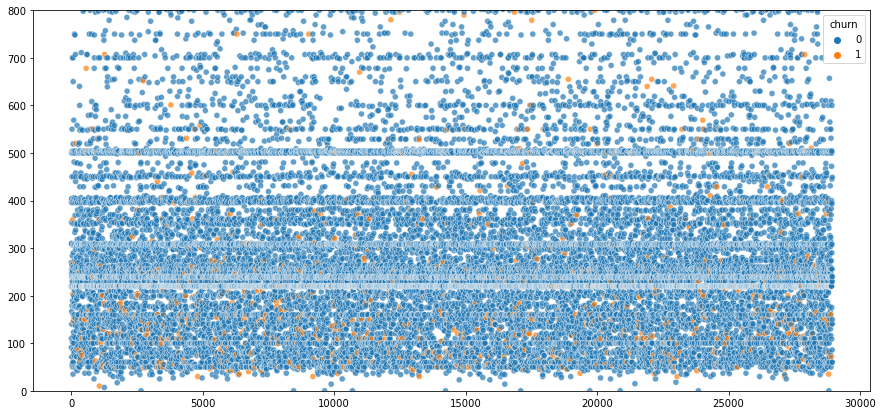

In [55]:
# Check the effect of max recharge amount on churn

plt.figure(figsize=(15,7))
sns.scatterplot(x=churn_data.index, y=churn_data['gd_ph_max_rech_amt'] + churn_data['max_rech_amt_7'],
                hue=churn_data['churn'], alpha=0.7)
plt.ylim(0,800)
plt.show()

In [56]:
#Observation
#We can see that users who had the max recharge amount less tha 200 churned more

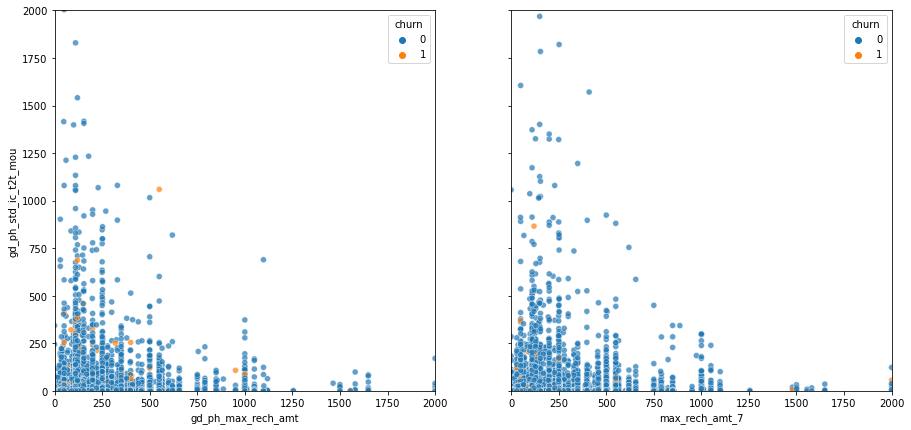

In [57]:
# Incoming from the same service provider vs the recharge amount

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15, 7))
sns.scatterplot(x='gd_ph_max_rech_amt', y='gd_ph_std_ic_t2t_mou', data=churn_data, ax=axes[0],
                hue='churn', alpha=0.7)
sns.scatterplot(x='max_rech_amt_7', y='std_ic_t2t_mou_7', data=churn_data, ax=axes[1], hue='churn', alpha=0.7)

# Limiting the graph to more general upper bound
axes[0].set_xlim(0,2000)
axes[1].set_xlim(0,2000)
plt.ylim(0,2000)

plt.show()

In [58]:
#Observation
#Users who have max recharge amount on the higher end and still have low incoming call mou during the good pahse, churned out more

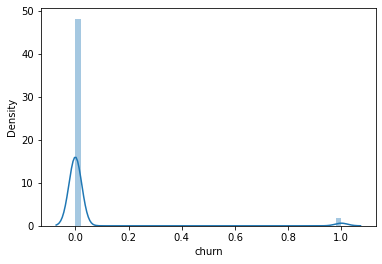

In [59]:
# Distribution of target variable

sns.distplot(churn_data['churn'])
plt.show()

In [60]:
#Observation
#Though the varible is not skwed it is higly imbalanced, the number of non-churners in the dataset is around 94%
#We will handle this imbalance using SMOTE algorithm

In [61]:
#DATA PREPARATION

In [62]:
# Cap the features with high outliers

col_upr_lmt = [('arpu_7', 7000), ('loc_og_mou_7', 4000), ('max_rech_amt_7', 1000 ), ('last_day_rch_amt_7', 1000 ), 
               ('aon', 3000), ('total_mou_7', 4000), ('gd_ph_loc_ic_mou', 3000), ('gd_ph_last_day_rch_amt', 1000 ), 
               ('gd_ph_std_og_mou', 4000), ('gd_ph_max_rech_amt', 1500), ('gd_ph_loc_og_mou', 3000), ('gd_ph_arpu', 7000)]

for col, value in col_upr_lmt:
    churn_data[col] = churn_data[col].apply(lambda x : x if x < value else value)

churn_data[col_boxplot].head()

arpu_7  loc_og_mou_7  max_rech_amt_7  last_day_rch_amt_7   aon  \
0  128.191         25.94              41                  10   647   
1   18.310          1.44               0                   0   468   
2  397.946         21.79             110                   0   322   
3  205.397        120.28             120                 120  1049   
4  377.294        366.79             250                 150   602   

   total_mou_7  gd_ph_loc_ic_mou  gd_ph_last_day_rch_amt  gd_ph_std_og_mou  \
0        42.94             21.54                      25              4.35   
1         8.16            140.69                      98             11.16   
2       836.22             26.93                     110            772.43   
3       210.45            289.09                     110             73.96   
4       366.78            233.18                       0              0.00   

   gd_ph_max_rech_amt  gd_ph_loc_og_mou  gd_ph_arpu  
0                  50             58.91     240.708  
1                 110             89.89     445.826  
2                 110             44.01     439.919  
3                 150            139.68     340.266  
4                 250            327.46     580.549

In [63]:
y = churn_data['churn']
X = churn_data.drop('churn', axis=1)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [65]:
churn_data.churn.value_counts()

0    27891
1     1054
Name: churn, dtype: int64

In [66]:
# Use SMOTE to take care of class imbalance
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

In [67]:
y_res.value_counts()

0    27891
1    27891
Name: churn, dtype: int64

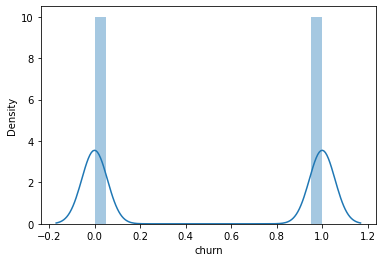

In [68]:
sns.distplot(y_res)
plt.show()

In [69]:
#PCA

In [70]:
X.shape

(28945, 55)

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(55782, 25)

In [72]:
#Model Building

In [73]:
#1. Logistic Regression
#For logistic regression we will be using the unaltered X and y so that we can use RFE for feature selection instead of PCA, to find out the strong predictor of churn

In [74]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [75]:
import statsmodels.api as sm

In [76]:
# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39047
Model:                            GLM   Df Residuals:                    38991
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -17936.
Date:                Tue, 08 Nov 2022   Deviance:                       35871.
Time:                        23:28:43   Pearson chi2:                 4.57e+08
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.3229      0.021    -63.559      0.000      -1.364      -1.282
arpu_7                     0.2543      0.046      5.580      0.000       0.165       0.344
roam_ic_mou_7             -0.2840      0.024    -11.767      0.000      -0.331      -0.237
roam_og_mou_7             -0.0835      0.051     -1.623      0.105      -0.184       0.017
loc_og_t2c_mou_7           0.1178      0.021      5.511      0.000       0.076       0.160
loc_og_mou_7              -0.5119      0.185     -2.771      0.006      -0.874      -0.150
std_og_t2f_mou_7          -0.0896      0.032     -2.788      0.005      -0.153      -0.027
std_og_mou_7              -0.5339      0.299     -1.786      0.074      -1.120       0.052
isd_og_mou_7               0.0881      0.052      1.694      0.090      -0.014       0.190
spl_og_mou_7              -0.0552      0.030     -1.825      0.068      -0.114       0.004
og_others_7               -0.0108      0.044     -0.244      0.807      -0.098       0.076
loc_ic_mou_7              -1.0654      0.049    -21.726      0.000      -1.161      -0.969
std_ic_t2t_mou_7           0.2212      0.057      3.856      0.000       0.109       0.334
std_ic_t2f_mou_7          -0.1182      0.046     -2.545      0.011      -0.209      -0.027
std_ic_mou_7              -0.6316      0.062    -10.209      0.000      -0.753      -0.510
spl_ic_mou_7              -0.1026      0.033     -3.066      0.002      -0.168      -0.037
isd_ic_mou_7              -0.2114      0.042     -5.031      0.000      -0.294      -0.129
ic_others_7               -0.2238      0.046     -4.817      0.000      -0.315      -0.133
total_rech_num_7          -0.8554      0.037    -23.220      0.000      -0.928      -0.783
max_rech_amt_7            -0.0906      0.026     -3.469      0.001      -0.142      -0.039
last_day_rch_amt_7        -0.4016      0.025    -15.874      0.000      -0.451      -0.352
vol_2g_mb_7               -0.1136      0.027     -4.146      0.000      -0.167      -0.060
monthly_2g_7              -0.5649      0.029    -19.775      0.000      -0.621      -0.509
sachet_2g_7               -0.2073      0.027     -7.547      0.000      -0.261      -0.153
monthly_3g_7              -0.4461      0.033    -13.488      0.000      -0.511      -0.381
sachet_3g_7               -0.0549      0.026     -2.083      0.037      -0.107      -0.003
aon                       -0.6233      0.018    -35.340      0.000      -0.658      -0.589
total_mou_7               -0.2919      0.329     -0.889      0.374      -0.936       0.352
gd_ph_monthly_2g           0.0187      0.020      0.956      0.339      -0.020       0.057
gd_ph_loc_og_t2c_mou      -0.0993      0.019     -5.158      0.000      -0.137      -0.062
gd_ph_isd_ic_mou           0.1668      0.033      5.066      0.000       0.102  

In [77]:
#RFE for Feature Selection

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Create LR object
logreg = LogisticRegression(solver='liblinear')

# Run RFE for 25 features
rfe = RFE(logreg, n_features_to_select=25)
rfe = rfe.fit(X_train, y_train)

In [79]:
rfe_col = X.columns[rfe.support_]
rfe_col

Index(['arpu_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'std_og_mou_7',
       'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_mou_7', 'isd_ic_mou_7',
       'ic_others_7', 'total_rech_num_7', 'last_day_rch_amt_7', 'monthly_2g_7',
       'sachet_2g_7', 'monthly_3g_7', 'aon', 'total_mou_7', 'gd_ph_isd_ic_mou',
       'gd_ph_ic_others', 'gd_ph_last_day_rch_amt', 'gd_ph_std_og_mou',
       'gd_ph_loc_ic_mou', 'gd_ph_spl_ic_mou', 'gd_ph_total_rech_num',
       'gd_ph_vbc_3g', 'vbc_3g_7'],
      dtype='object')

In [80]:
# Build model with RFE selected features
X_train_sm = sm.add_constant(X_train[rfe_col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39047
Model:                            GLM   Df Residuals:                    39021
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18085.
Date:                Tue, 08 Nov 2022   Deviance:                       36170.
Time:                        23:29:23   Pearson chi2:                 1.66e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2927      0.020    -63.458      0.000      -1.333      -1.253
arpu_7                     0.1932      0.032      6.016      0.000       0.130       0.256
roam_ic_mou_7             -0.2165      0.018    -11.952      0.000      -0.252      -0.181
loc_og_mou_7              -0.3634      0.066     -5.492      0.000      -0.493      -0.234
std_og_mou_7              -0.3969      0.105     -3.778      0.000      -0.603      -0.191
loc_ic_mou_7              -1.0860      0.046    -23.572      0.000      -1.176      -0.996
std_ic_t2t_mou_7           0.2659      0.044      6.026      0.000       0.179       0.352
std_ic_mou_7              -0.5711      0.049    -11.674      0.000      -0.667      -0.475
isd_ic_mou_7              -0.2006      0.040     -4.972      0.000      -0.280      -0.122
ic_others_7               -0.2582      0.046     -5.653      0.000      -0.348      -0.169
total_rech_num_7          -0.9059      0.033    -27.253      0.000      -0.971      -0.841
last_day_rch_amt_7        -0.4219      0.023    -18.219      0.000      -0.467      -0.377
monthly_2g_7              -0.6234      0.025    -25.221      0.000      -0.672      -0.575
sachet_2g_7               -0.2086      0.019    -11.229      0.000      -0.245      -0.172
monthly_3g_7              -0.4038      0.028    -14.323      0.000      -0.459      -0.349
aon                       -0.6201      0.017    -35.743      0.000      -0.654      -0.586
total_mou_7               -0.3957      0.119     -3.323      0.001      -0.629      -0.162
gd_ph_isd_ic_mou           0.1676      0.032      5.248      0.000       0.105       0.230
gd_ph_ic_others            0.1948      0.027      7.210      0.000       0.142       0.248
gd_ph_last_day_rch_amt     0.1561      0.017      9.098      0.000       0.122       0.190
gd_ph_std_og_mou           0.4966      0.025     19.848      0.000       0.448       0.546
gd_ph_loc_ic_mou           0.7436      0.032     23.216      0.000       0.681       0.806
gd_ph_spl_ic_mou          -0.1906      0.018    -10.516      0.000      -0.226      -0.155
gd_ph_total_rech_num       0.5361      0.024     22.710      0.000       0.490       0.582
gd_ph_vbc_3g               0.2761      0.023     12.218      0.000       0.232       0.320
vbc_3g_7                  -0.4544      0.035    -13.042      0.000      -0.523      -0.386
==========================================================================================
"""

In [81]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.772205          1
1      1    0.548705          1
2      1    0.882217          1
3      0    0.506971          1
4      1    0.230364          0

In [82]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[15087  4377]
 [ 3580 16003]]

Accuracy : 0.7962199400722206


In [83]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
15             total_mou_7  38.79
3             std_og_mou_7  25.26
2             loc_og_mou_7  10.47
0                   arpu_7   4.07
4             loc_ic_mou_7   3.18
9         total_rech_num_7   3.10
19        gd_ph_std_og_mou   2.56
20        gd_ph_loc_ic_mou   2.54
16        gd_ph_isd_ic_mou   2.51
7             isd_ic_mou_7   2.46
22    gd_ph_total_rech_num   2.14
24                vbc_3g_7   2.14
6             std_ic_mou_7   2.03
5         std_ic_t2t_mou_7   1.94
17         gd_ph_ic_others   1.89
8              ic_others_7   1.81
23            gd_ph_vbc_3g   1.73
13            monthly_3g_7   1.60
10      last_day_rch_amt_7   1.56
18  gd_ph_last_day_rch_amt   1.44
12             sachet_2g_7   1.31
14                     aon   1.24
11            monthly_2g_7   1.17
1            roam_ic_mou_7   1.15
21        gd_ph_spl_ic_mou   1.02

In [84]:
rfe_col = rfe_col.drop('total_mou_7', 1)

In [85]:
# Build new model
X_train_sm = sm.add_constant(X_train[rfe_col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                39047
Model:                            GLM   Df Residuals:                    39022
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -18091.
Date:                Tue, 08 Nov 2022   Deviance:                       36181.
Time:                        23:29:26   Pearson chi2:                 1.54e+09
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -1.2922      0.020    -63.494      0.000      -1.332      -1.252
arpu_7                     0.1437      0.029      4.997      0.000       0.087       0.200
roam_ic_mou_7             -0.2358      0.017    -13.750      0.000      -0.269      -0.202
loc_og_mou_7              -0.5546      0.032    -17.482      0.000      -0.617      -0.492
std_og_mou_7              -0.7266      0.035    -20.636      0.000      -0.796      -0.658
loc_ic_mou_7              -1.0793      0.046    -23.503      0.000      -1.169      -0.989
std_ic_t2t_mou_7           0.2663      0.044      6.065      0.000       0.180       0.352
std_ic_mou_7              -0.5683      0.049    -11.634      0.000      -0.664      -0.473
isd_ic_mou_7              -0.1978      0.040     -4.920      0.000      -0.277      -0.119
ic_others_7               -0.2574      0.046     -5.635      0.000      -0.347      -0.168
total_rech_num_7          -0.9022      0.033    -27.126      0.000      -0.967      -0.837
last_day_rch_amt_7        -0.4284      0.023    -18.505      0.000      -0.474      -0.383
monthly_2g_7              -0.6170      0.025    -25.038      0.000      -0.665      -0.569
sachet_2g_7               -0.2056      0.019    -11.078      0.000      -0.242      -0.169
monthly_3g_7              -0.3901      0.028    -13.988      0.000      -0.445      -0.335
aon                       -0.6188      0.017    -35.687      0.000      -0.653      -0.585
gd_ph_isd_ic_mou           0.1664      0.032      5.231      0.000       0.104       0.229
gd_ph_ic_others            0.1955      0.027      7.217      0.000       0.142       0.249
gd_ph_last_day_rch_amt     0.1580      0.017      9.220      0.000       0.124       0.192
gd_ph_std_og_mou           0.4922      0.025     19.683      0.000       0.443       0.541
gd_ph_loc_ic_mou           0.7457      0.032     23.291      0.000       0.683       0.808
gd_ph_spl_ic_mou          -0.1904      0.018    -10.502      0.000      -0.226      -0.155
gd_ph_total_rech_num       0.5348      0.024     22.655      0.000       0.489       0.581
gd_ph_vbc_3g               0.2773      0.023     12.281      0.000       0.233       0.322
vbc_3g_7                  -0.4501      0.035    -12.943      0.000      -0.518      -0.382
==========================================================================================
"""

In [86]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.772008          1
1      1    0.548040          1
2      1    0.882048          1
3      0    0.504622          1
4      1    0.228801          0

In [87]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[15082  4382]
 [ 3573 16010]]

Accuracy : 0.7962711603964453


In [88]:
#Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                   arpu_7  3.66
3             std_og_mou_7  3.20
4             loc_ic_mou_7  3.18
9         total_rech_num_7  3.10
19        gd_ph_loc_ic_mou  2.53
18        gd_ph_std_og_mou  2.52
15        gd_ph_isd_ic_mou  2.51
7             isd_ic_mou_7  2.46
21    gd_ph_total_rech_num  2.14
23                vbc_3g_7  2.14
6             std_ic_mou_7  2.03
5         std_ic_t2t_mou_7  1.94
16         gd_ph_ic_others  1.89
2             loc_og_mou_7  1.88
8              ic_others_7  1.81
22            gd_ph_vbc_3g  1.73
13            monthly_3g_7  1.57
10      last_day_rch_amt_7  1.56
17  gd_ph_last_day_rch_amt  1.44
12             sachet_2g_7  1.31
14                     aon  1.24
11            monthly_2g_7  1.16
1            roam_ic_mou_7  1.04
20        gd_ph_spl_ic_mou  1.02

In [89]:
# Predict on train data

y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted
0      0    0.772008          1
1      1    0.548040          1
2      1    0.882048          1
3      0    0.504622          1
4      1    0.228801          0

In [90]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted)}')

[[15082  4382]
 [ 3573 16010]]

Accuracy : 0.7962711603964453


In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_col].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_col].values, i) for i in range(X_train[rfe_col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
0                   arpu_7  3.66
3             std_og_mou_7  3.20
4             loc_ic_mou_7  3.18
9         total_rech_num_7  3.10
19        gd_ph_loc_ic_mou  2.53
18        gd_ph_std_og_mou  2.52
15        gd_ph_isd_ic_mou  2.51
7             isd_ic_mou_7  2.46
21    gd_ph_total_rech_num  2.14
23                vbc_3g_7  2.14
6             std_ic_mou_7  2.03
5         std_ic_t2t_mou_7  1.94
16         gd_ph_ic_others  1.89
2             loc_og_mou_7  1.88
8              ic_others_7  1.81
22            gd_ph_vbc_3g  1.73
13            monthly_3g_7  1.57
10      last_day_rch_amt_7  1.56
17  gd_ph_last_day_rch_amt  1.44
12             sachet_2g_7  1.31
14                     aon  1.24
11            monthly_2g_7  1.16
1            roam_ic_mou_7  1.04
20        gd_ph_spl_ic_mou  1.02

In [92]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [93]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8175458305673288

In [94]:
# Let us calculate specificity
TN / float(TN+FP)

0.7748664200575421

In [95]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.22513357994245786


In [96]:
#positive predictive value 
print (TP / float(TP+FP))

0.7851118085523735


In [97]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8084695792012865


In [98]:
#plotting ROC

In [99]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

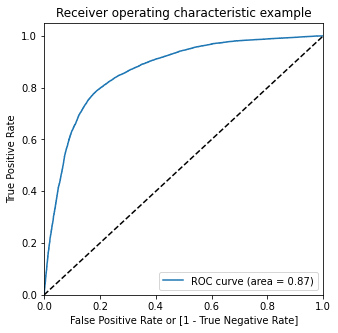

In [100]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

In [101]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.772008          1    1    1    1    1    1    1    1    1    0   
1      1    0.548040          1    1    1    1    1    1    1    0    0    0   
2      1    0.882048          1    1    1    1    1    1    1    1    1    1   
3      0    0.504622          1    1    1    1    1    1    1    0    0    0   
4      1    0.228801          0    1    1    1    0    0    0    0    0    0   

   0.9  
0    0  
1    0  
2    0  
3    0  
4    0

In [102]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5, 0.5, 0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.501524  1.000000  0.000000
0.1   0.1  0.635952  0.982791  0.286991
0.2   0.2  0.705995  0.957974  0.452476
0.3   0.3  0.749020  0.917173  0.579840
0.4   0.4  0.778344  0.872236  0.683878
0.5   0.5  0.796271  0.817546  0.774866
0.6   0.6  0.795528  0.744830  0.846537
0.7   0.7  0.762286  0.620845  0.904593
0.8   0.8  0.681589  0.415922  0.948880
0.9   0.9  0.583989  0.187969  0.982429


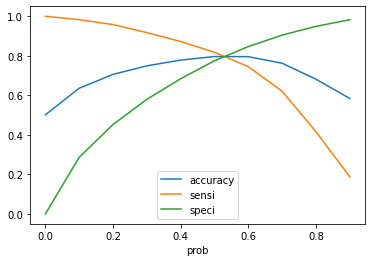

In [103]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [104]:
X_test = X_test[rfe_col]
X_test_sm = sm.add_constant(X_test)

# Predict on test data

y_test_pred = res.predict(X_test_sm)
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'Churn_Prob':y_test_pred})
y_test_pred_final['predicted'] = y_test_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_test_pred_final.head()

Churn  Churn_Prob  predicted
34621      1    0.702591          1
3274       0    0.722482          1
19255      0    0.636704          1
38391      1    0.084903          0
22096      0    0.110217          0

In [105]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Churn, y_test_pred_final.predicted )
print(confusion)

print()

# The overall accuracy.
print(f'Accuracy : {metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted)}')

[[6522 1905]
 [1558 6750]]

Accuracy : 0.7930684194801315


In [106]:
# Top 10 predictors

abs(res.params).sort_values(ascending=False)[0:11]

const                   1.292159
loc_ic_mou_7            1.079307
total_rech_num_7        0.902228
gd_ph_loc_ic_mou        0.745662
std_og_mou_7            0.726637
aon                     0.618817
monthly_2g_7            0.616976
std_ic_mou_7            0.568270
loc_og_mou_7            0.554553
gd_ph_total_rech_num    0.534813
gd_ph_std_og_mou        0.492232
dtype: float64

In [107]:
#So using Logistic regression we are geting an accuracy of 79.6% on train data and 79.3% on test data
#We can clearly see most of the critical features are form the action phase, which is inline with the bussiness understanding that action phase needs more attention

In [108]:
#2. Decission Tree

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [110]:
from sklearn.tree import DecisionTreeClassifier

# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.881988372986401
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      8427
           1       0.79      0.91      0.84      8308

    accuracy                           0.83     16735
   macro avg       0.84      0.83      0.83     16735
weighted avg       0.84      0.83      0.83     16735



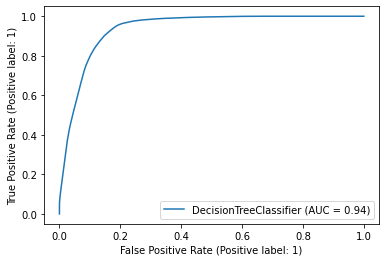

In [111]:
# Plot ROC curve
from sklearn.metrics import plot_roc_curve
plot_roc_curve(intial_dt, X_train, y_train, drop_intermediate=False)
plt.show()

In [112]:
#Hyperparameter tuning

In [113]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [114]:
grid_search.best_score_

0.8762261393966067

In [115]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=40, random_state=42)

In [116]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      8427
           1       0.87      0.91      0.89      8308

    accuracy                           0.89     16735
   macro avg       0.89      0.89      0.89     16735
weighted avg       0.89      0.89      0.89     16735



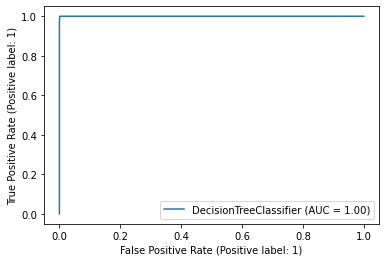

In [117]:
# ROC
plot_roc_curve(dt_best, X_train, y_train)
plt.show()

In [118]:
#We are getting an accuracy of 89% on test data, with decission tree

In [119]:
# 3. Random Forest

Train accuracy : 0.881988372986401
              precision    recall  f1-score   support

           0       0.92      0.85      0.88      8427
           1       0.86      0.92      0.89      8308

    accuracy                           0.89     16735
   macro avg       0.89      0.89      0.89     16735
weighted avg       0.89      0.89      0.89     16735



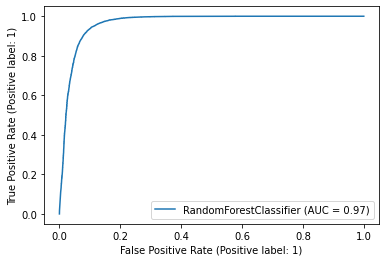

In [120]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
plot_roc_curve(rf, X_train, y_train)
plt.show()

In [121]:
#Hyperparameter tuning

In [122]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [123]:
grid_search.best_score_

0.933055021676541

In [124]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [125]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8427
           1       0.93      0.96      0.94      8308

    accuracy                           0.94     16735
   macro avg       0.94      0.94      0.94     16735
weighted avg       0.94      0.94      0.94     16735



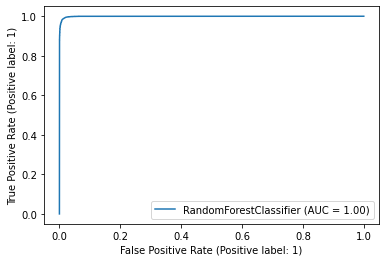

In [126]:
plot_roc_curve(rf_best, X_train, y_train)
plt.show()

In [127]:
#We are getting an accuracy of 95% on test data, with Random forest

In [128]:
#4. Adaboost

In [129]:
from sklearn.ensemble import AdaBoostClassifier

In [130]:
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.676068120705109

In [131]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

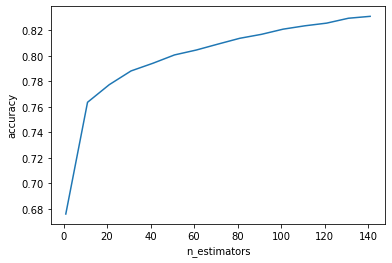

In [132]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()

In [133]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      8427
           1       0.93      0.96      0.94      8308

    accuracy                           0.94     16735
   macro avg       0.94      0.94      0.94     16735
weighted avg       0.94      0.94      0.94     16735



In [134]:
churn_data.head()

arpu_7  roam_ic_mou_7  roam_og_mou_7  loc_og_t2c_mou_7  loc_og_mou_7  \
0  128.191            0.0            0.0              9.85         25.94   
1   18.310            0.0            0.0              0.00          1.44   
2  397.946            0.0            0.0              0.00         21.79   
3  205.397            0.0            0.0              0.00        120.28   
4  377.294            0.0            0.0              0.00        366.79   

   std_og_t2f_mou_7  std_og_mou_7  isd_og_mou_7  spl_og_mou_7  og_others_7  \
0               0.0          0.00           0.0          17.0          0.0   
1               0.0          6.71           0.0           0.0          0.0   
2               0.0        814.43           0.0           0.0          0.0   
3               0.0         90.18           0.0           0.0          0.0   
4               0.0          0.00           0.0           0.0          0.0   

   loc_ic_mou_7  std_ic_t2t_mou_7  std_ic_t2f_mou_7  std_ic_mou_7  \
0          9.36              0.00              0.00          0.00   
1          2.28              0.00              1.53         63.78   
2         26.21              0.00              0.48          9.13   
3        242.91             13.01              0.03         93.39   
4        776.36              0.00              1.03          1.03   

   spl_ic_mou_7  isd_ic_mou_7  ic_others_7  total_rech_num_7  max_rech_amt_7  \
0           0.0           0.0         0.00                10              41   
1           0.0           0.0         0.00                 3               0   
2           0.0           0.0         0.00                10             110   
3           0.0           0.0         0.46                 3             120   
4           0.0           0.0         0.00                 3             250   

   last_day_rch_amt_7  vol_2g_mb_7  monthly_2g_7  sachet_2g_7  monthly_3g_7  \
0                  10       308.89             0            6             0   
1                   0         0.00             0            0             0   
2                   0         0.00             0            0             0   
3                 120         0.00             0            0             0   
4                 150         0.00             0            0             0   

   sachet_3g_7   aon  churn  total_mou_7  gd_ph_monthly_2g  \
0            1   647      0        42.94                 0   
1            0   468      0         8.16                 0   
2            0   322      0       836.22                 0   
3            0  1049      0       210.45                 0   
4            0   602      0       366.78                 1   

   gd_ph_loc_og_t2c_mou  gd_ph_isd_ic_mou  gd_ph_loc_og_mou  gd_ph_ic_others  \
0                  0.00               0.0             58.91             0.00   
1                  0.00               0.0             89.89             0.00   
2                  0.00               0.0             44.01             0.00   
3                  8.16               0.0            139.68             3.74   
4                  0.00               0.0            327.46             0.00   

   gd_ph_roam_og_mou  gd_ph_last_day_rch_amt  gd_ph_sachet_3g  \
0              15.73                      25                0   
1              20.30                      98                0   
2               0.00                     110                0   
3               0.00                     110                0   
4               0.00                       0                0   

   gd_ph_std_ic_mou  gd_ph_std_og_mou  gd_ph_spl_og_mou  gd_ph_loc_ic_mou  \
0              0.00              4.35              0.00             21.54   
1            444.79             11.16              0.00            140.69   
2              7.56            772.43              0.00             26.93   
3            121.41             73.96              8.79            289.09   
4              0.00              0.00              0.08            233.18   


(16735,)